In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [73]:
url = "https://raw.githubusercontent.com/shypotatosage/ALP_ML_Mimi_Evelyn/master/StressLevelDataset.csv"
df = pd.read_csv(url)
# df = df.drop(columns=['ID'])
df.head()

anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2                     3           2   
1                  1  ...            2                     1           4   
2                  2  ...            2                     2           3   
3                  2  ...            2                     2           4   
4                  2  ...            3                     4           3   

   teacher_student_relationship  future_career_concerns  social_support  \
0                             3                       3               2   
1                             1                       5               1   
2                             3                       2               2   
3                             1                       4               1   
4                             1                       2               1   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0              3                           3         2             1  
1              4                           5         5             2  
2              3                           2         2             1  
3              4                           4         5             2  
4              5                           0         5             1  

[5 rows x 21 columns]

In [74]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [75]:
# Check isna Data 
(df.isna()).sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [49]:
# Check Empty Data 
(df == '').sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

# Data Preprocessing

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Warehouse_block'] = le.fit_transform(df['Warehouse_block'].values)
df['Mode_of_Shipment'] = le.fit_transform(df['Mode_of_Shipment'].values)
df['Gender'] = le.fit_transform(df['Gender'].values)
df['Product_importance'] = le.fit_transform(df['Product_importance'].values)

df.head(n=10)

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                3                 0                    4                2   
1                4                 0                    4                5   
2                0                 0                    2                2   
3                1                 0                    3                3   
4                2                 0                    2                2   
5                4                 0                    3                1   
6                3                 0                    3                4   
7                4                 0                    4                1   
8                0                 0                    3                4   
9                1                 0                    3                2   

   Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
0                  177                3                   1       0   
1                  216                2                   1       1   
2                  183                4                   1       1   
3                  176                4                   2       1   
4                  184                3                   2       0   
5                  162                3                   2       0   
6                  250                3                   1       0   
7                  233                2                   1       0   
8                  150                3                   1       0   
9                  164                3                   2       0   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1  
5                12           1417                    1  
6                 3           2371                    1  
7                48           2804                    1  
8                11           1861                    1  
9                29           1187                    1

# Exploratory Data Analysis (Univariate)

In [76]:
# Dataset Description
df.describe()

anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000           0.000000   
25%       1.000000        1.000000       1.000000           2.000000   
50%       3.000000        2.000000       2.500000           3.000000   
75%       3.000000        3.000000       4.000000           4.000000   
max       5.000000        3.000000       5.000000           5.000000   

       noise_level  living_conditions  ...  basic_needs  academic_performance  \
count  1100.000000        1100.000000  ...  1100.000000           1100.000000   
mean      2.649091           2.518182  ...     2.772727              2.772727   
std       1.328127           1.119208  ...     1.433761              1.414594   
min       0.000000           0.000000  ...     0.000000              0.000000   
25%       2.000000           2.000000  ...     2.000000              2.000000   
50%       3.000000           2.000000  ...     3.000000              2.000000   
75%       3.000000           3.000000  ...     4.000000              4.000000   
max       5.000000           5.000000  ...     5.000000              5.000000   

        study_load  teacher_student_relationship  future_career_concerns  \
count  1100.000000                   1100.000000             1100.000000   
mean      2.621818                      2.648182                2.649091   
std       1.315781                      1.384579                1.529375   
min       0.000000                      0.000000                0.000000   
25%       2.000000                      2.000000                1.000000   
50%       2.000000                      2.000000                2.000000   
75%       3.000000                      4.000000                4.000000   
max       5.000000                      5.000000                5.000000   

       social_support  peer_pressure  extracurricular_activities     bullying  \
count     1100.000000    1100.000000                 1100.000000  1100.000000   
mean         1.881818       2.734545                    2.767273     2.617273   
std          1.047826       1.425265                    1.417562     1.530958   
min          0.000000       0.000000                    0.000000     0.000000   
25%          1.000000       2.000000                    2.000000     1.000000   
50%          2.000000       2.000000                    2.500000     3.000000   
75%          3.000000       4.000000                    4.000000     4.000000   
max          3.000000       5.000000                    5.000000     5.000000   

       stress_level  
count   1100.000000  
mean       0.996364  
std        0.821673  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        2.000000  
max        2.000000  

[8 rows x 21 columns]

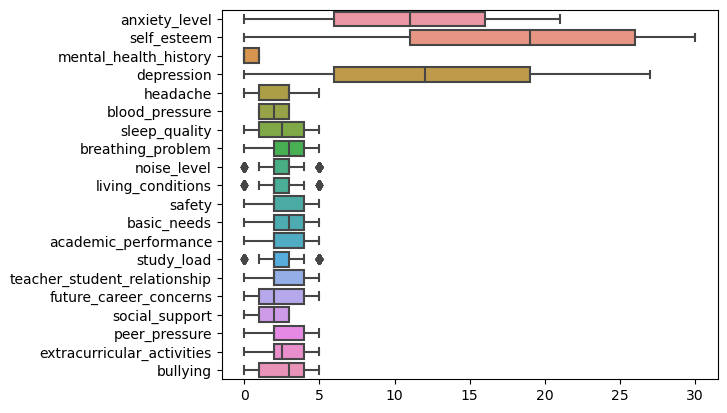

In [78]:
# Display Graphical Univariate EDA using box plot to analyze data distribution
sns.boxplot(data=df.drop(columns=['stress_level']), orient='h')
plt.show()

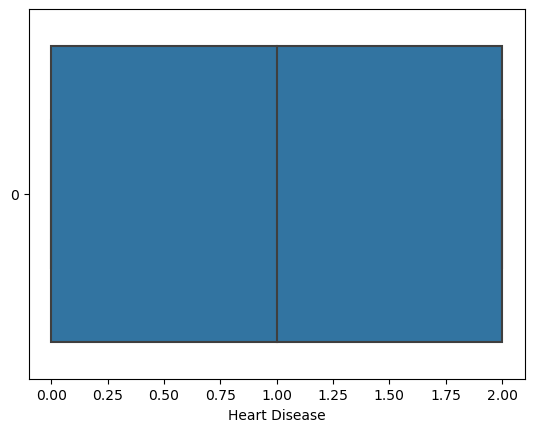

In [79]:
# Display a separate boxplot for 'HeartDisease' 
sns.boxplot(data=df["stress_level"],orient="h")
plt.xlabel('Heart Disease')
plt.show()

# Exploratory Data Analysis (Multivariate)

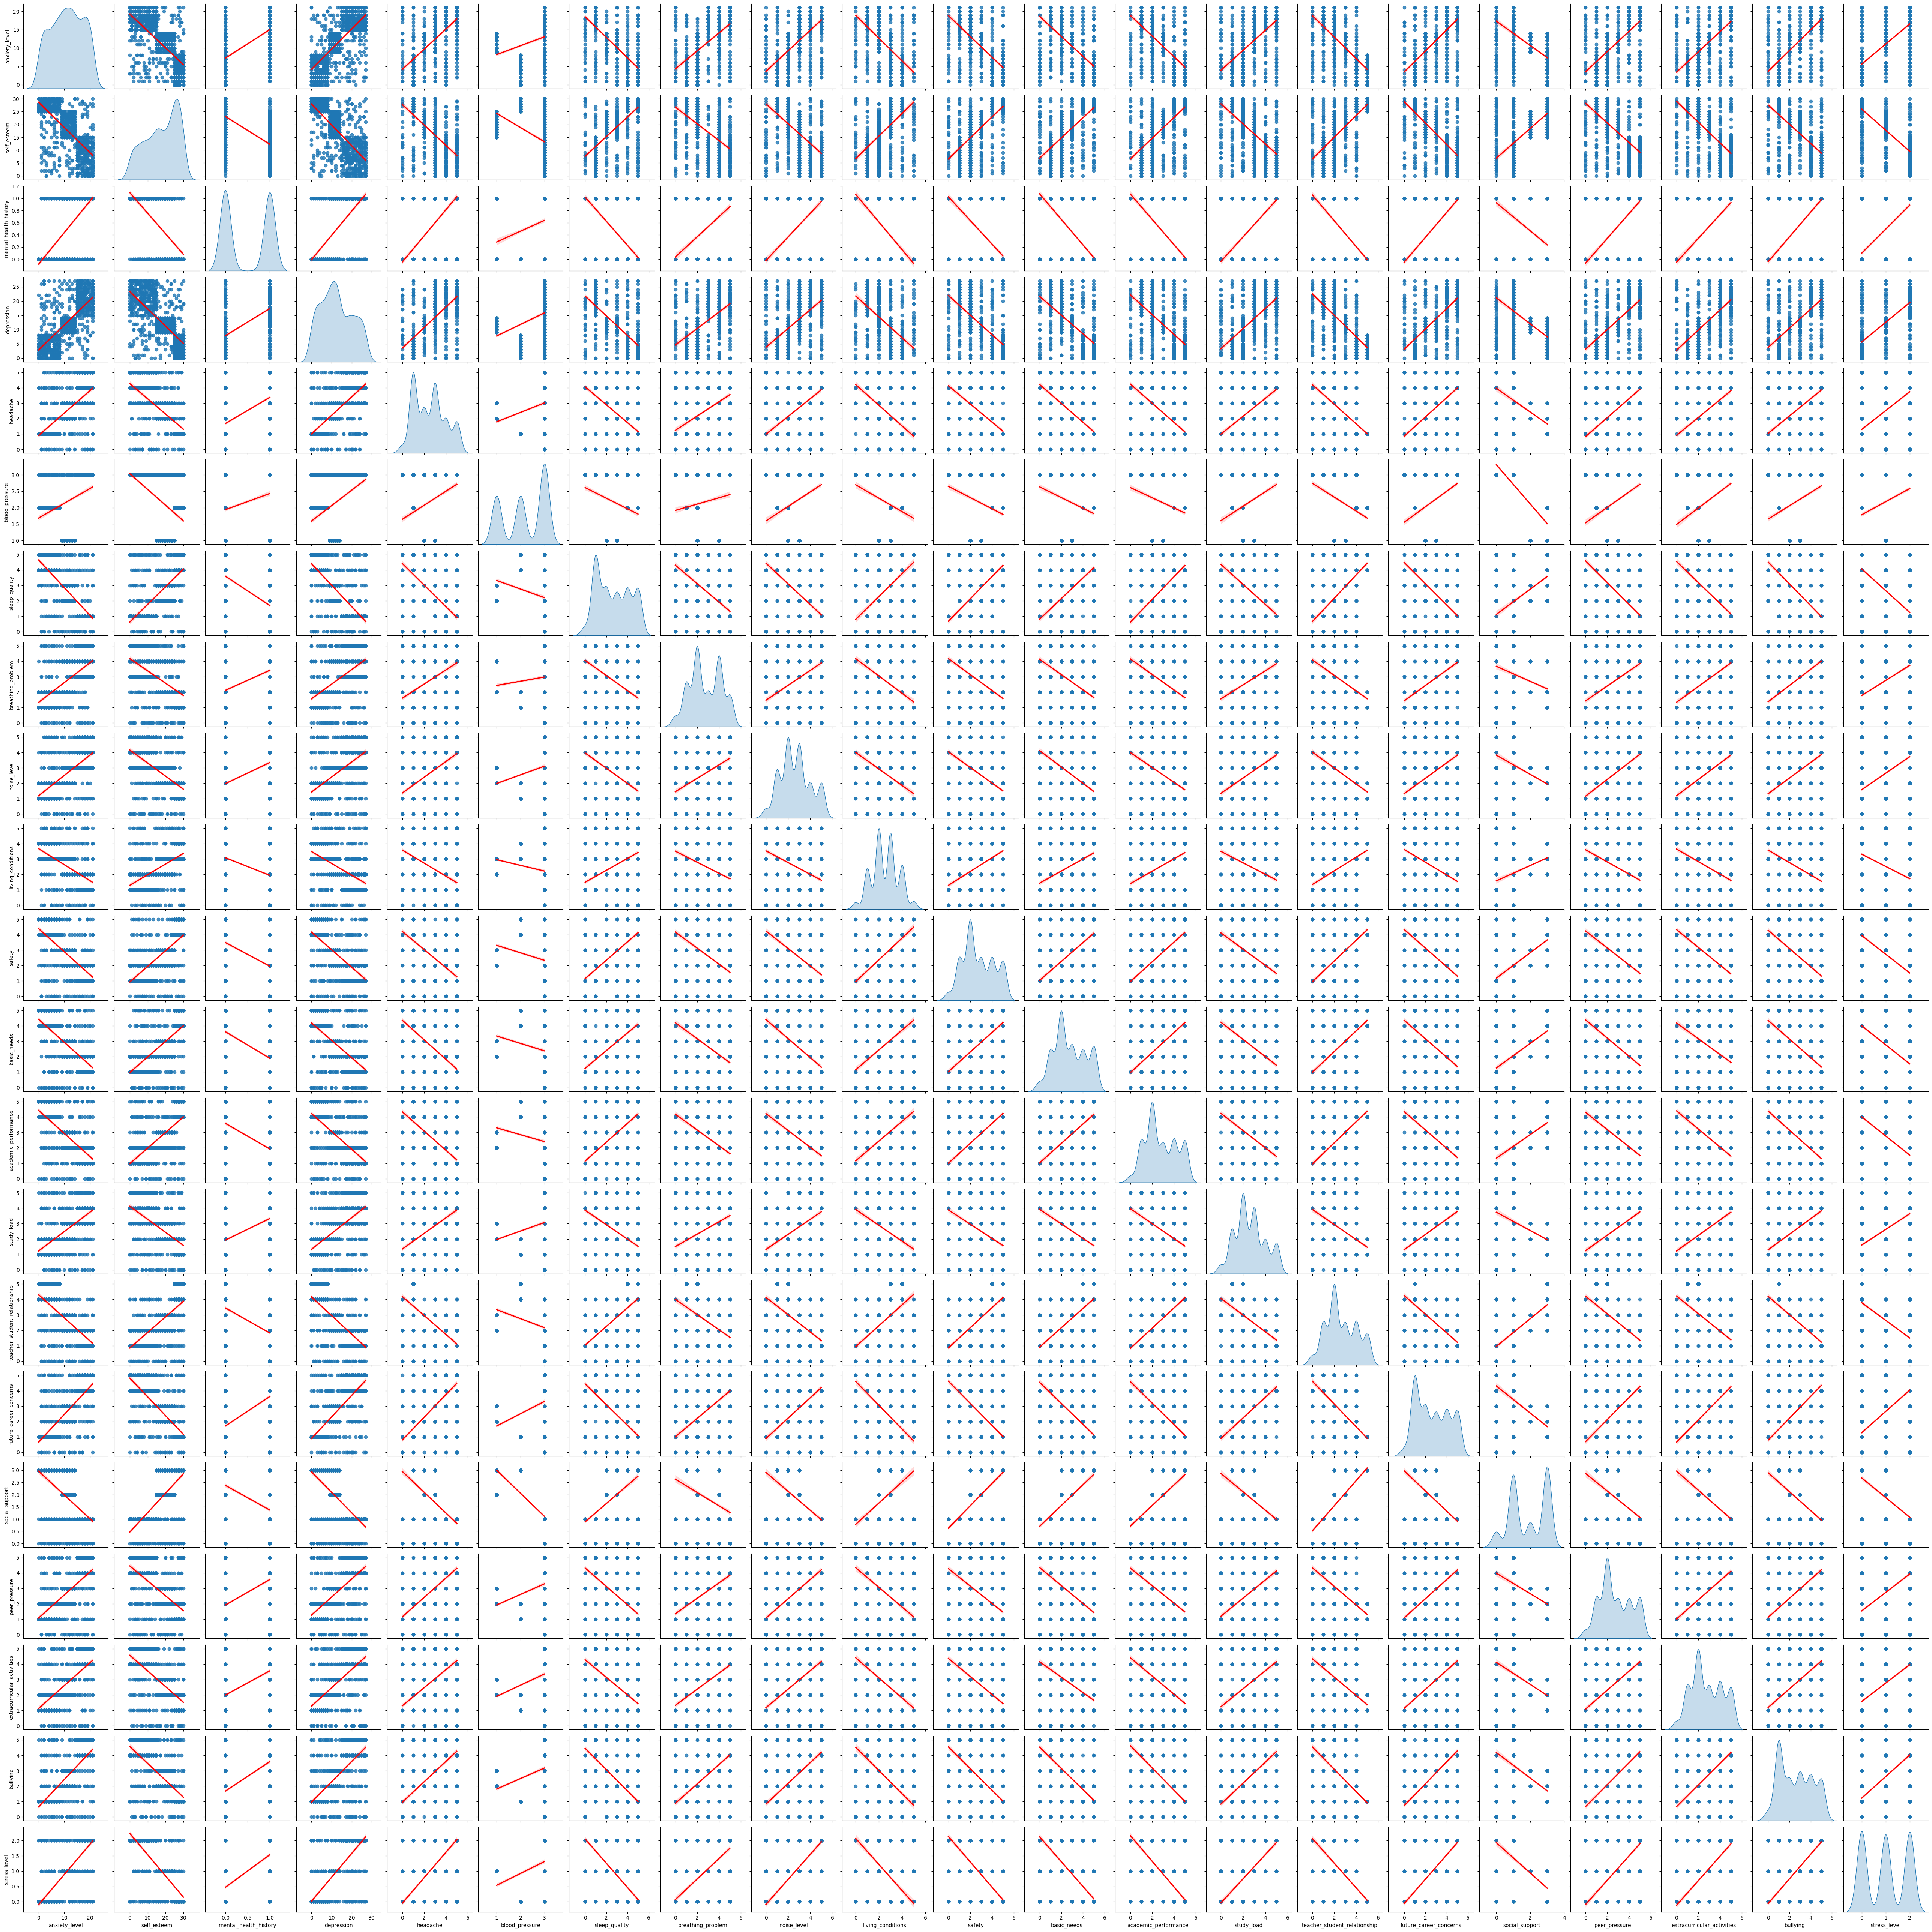

In [80]:
# Display the Multivariate EDA using pair plot
sns.pairplot(data=df, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.show()

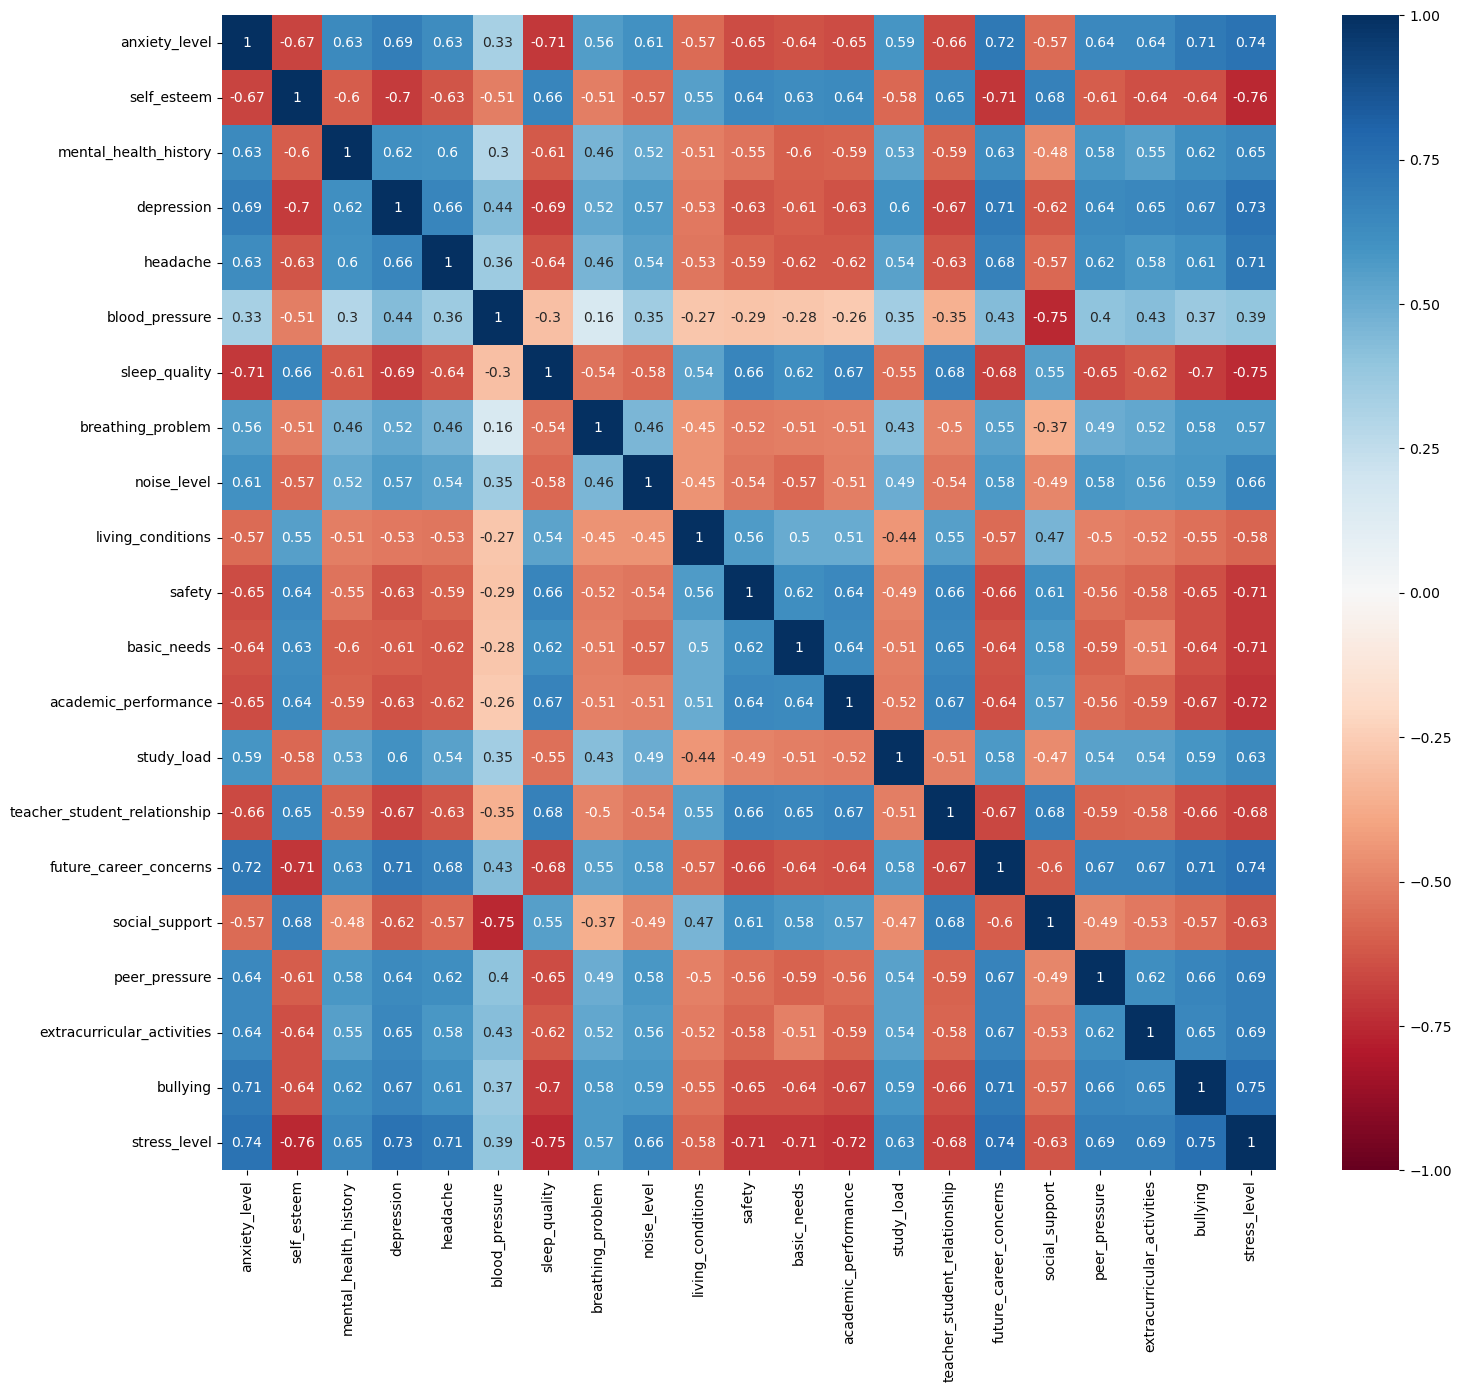

In [81]:
# Display the correlation strength and direction using heatmap
plt.subplots(figsize=(17,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

# Split Dataset

In [82]:
# Asumsi X adalah kolom yang diletakkan dari kolom kiri, kecuali paling kanan
X = df.iloc[:, :-1].values

# Asumsi X adalah dependent variable paling kanan
y = df.iloc[:, -1].values

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

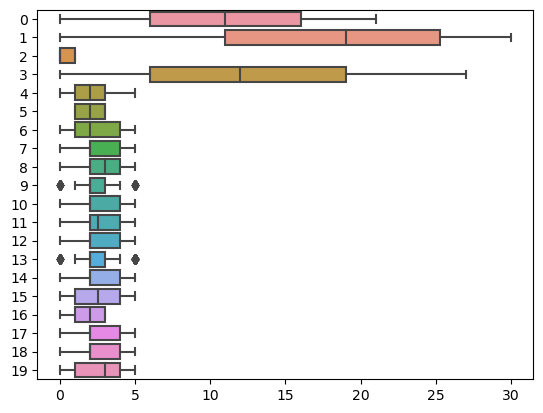

In [84]:
# Display EDA Before Scaling
sns.boxplot(data=X_train, orient='h')
plt.show()

In [60]:
#Standard Scaler need to be used when the scale are different
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

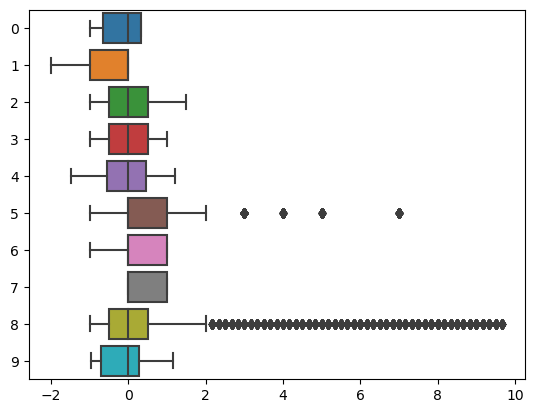

In [61]:
# Display EDA After Scaling
sns.boxplot(data=X_train, orient='h')
plt.show()

# Model Generation

## Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

C:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [99]:
# Make y prediction based on X test
y_pred = logreg.predict(X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

y_test  y_pred
0       0       0
1       1       1
2       2       2
3       0       0
4       1       2
5       1       1
6       1       1
7       1       1
8       2       2
9       1       1

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Identifying TP, TN, FP, and FN
cmlogreg = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cmlogreg)
# Display the accuracy score
accuracylogreg = accuracy_score (y_test, y_pred)
print("Accuracy Score: {:0.3f}". format (accuracylogreg))

Confusion Matrix
 [[67  2  5]
 [ 4 71  5]
 [ 4  2 60]]
Accuracy Score: 0.900


In [101]:
from sklearn.metrics import log_loss
loglosslogreg = log_loss(y_test, logreg.predict_proba(X_test))
loglosslogreg
#the lower the better 
# Log Loss around "0.5" considered the classification model reasonable enough

0.30234193295477185

## KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
#attempt at finding the best n neighbor value for euclidean using loop
# Define the range of n_ neighbors values
n_neighbors_values = range(1, 100)

# Create empty lists to store accuracy scores and n_ neighbors values
accuracy_scores = []
n_neighbors_values_list = []
highest_accuracy = 0.0

# Iterate over the n_ neighbors values
for n_neighbors in n_neighbors_values:
# Create the K-NN classifier
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric = "euclidean", p=2)
    knnclass = classifier.fit(X_train, y_train)
# Make predictions on the test set
    y_pred = classifier.predict(X_test)
# Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
# Append accuracy score and n_neighbors value to the respective lists
    accuracy_scores.append(accuracy)
    n_neighbors_values_list.append(n_neighbors)
#find highest accuracy 
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_n_neighbors = n_neighbors

C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

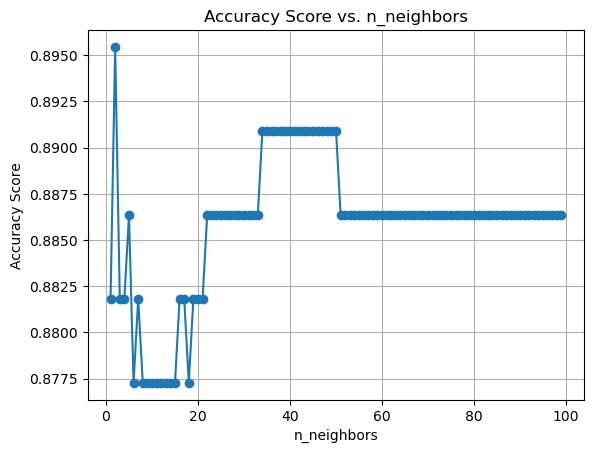

Highest Accuracy Score: 0.895 (n_neighbors=2)


In [108]:
# Create the plot
plt.plot(n_neighbors_values_list, accuracy_scores, marker='o') 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. n_neighbors')
plt.grid(True)
plt.show()
print ("Highest Accuracy Score: {:.3f} (n_neighbors={})".format(highest_accuracy, best_n_neighbors))

## Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
# Create an instance of the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
y_pred = rf_classifier.predict(X_test)
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

y_test  y_pred
0       0       0
1       1       1
2       2       2
3       0       0
4       1       2
5       1       1
6       1       1
7       1       1
8       2       2
9       1       0

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Identifying TP, TN, FP, and FN
cmrf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cmrf)
# Display the accuracy score
accuracyrf = accuracy_score (y_test, y_pred) 
print("Accuracy Score: {:0.3f}". format (accuracyrf))

Confusion Matrix
 [[65  1  8]
 [ 7 69  4]
 [ 5  1 60]]
Accuracy Score: 0.882


## SVM

In [94]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Identifying TP, TN, FP, and FN
cmrf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cmrf)
# Display the accuracy score
accuracyrf = accuracy_score (y_test, y_pred) 
print("Accuracy Score: {:0.3f}". format (accuracyrf))

Confusion Matrix
 [[64  3  7]
 [ 3 71  6]
 [ 3  3 60]]
Accuracy Score: 0.886


## Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Identifying TP, TN, FP, and FN
cmrf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cmrf)
# Display the accuracy score
accuracyrf = accuracy_score (y_test, y_pred) 
print("Accuracy Score: {:0.3f}". format (accuracyrf))

Confusion Matrix
 [[67  5  2]
 [ 6 68  6]
 [ 2  4 60]]
Accuracy Score: 0.886
